# Figures
A series of ipython/jupyter notebook cells to plot nice figures. 

## Figures for the presentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

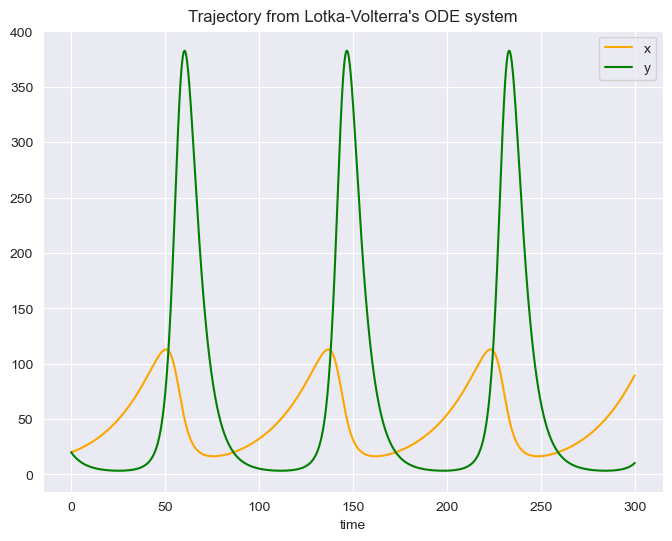

In [2]:
# read a CSV file with the system dynamic
csv_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/lotka-volterra.csv"
df_ode = pd.read_csv(csv_file_name)
# just consider a small part of the dynamic
df_ode = df_ode.iloc[:3000]

x = df_ode["t"].values
y_X = df_ode["x"].values
y_Y = df_ode["y"].values

figure, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_X, color='orange', label="x")
ax.plot(x, y_Y, color='green', label="y")
ax.set_xlabel("time")
ax.set_title("Trajectory from Lotka-Volterra's ODE system")
ax.legend(loc='best')

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Text(0, 0.5, 'error')

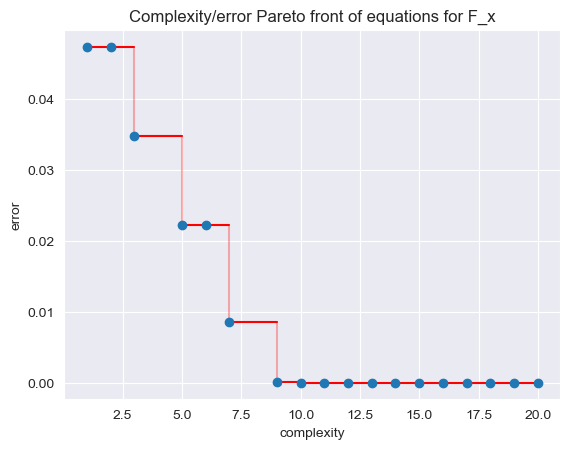

In [3]:
# it would also be nice to get the Pareto fronts complexity/fitting
import pickle
# load PySRRegressor file for F_x
pysr_x_pickle_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/regressor-F_x.pkl"
with open(pysr_x_pickle_file_name, "rb") as fp :
    pysr_x = pickle.load(fp)

complexity = pysr_x.equations_["complexity"].values
error = pysr_x.equations_["loss"].values

figure, ax = plt.subplots()

# now, this block of code plots red horizontal/vertical segments between points
for i in range(1, len(complexity)) :
    start_x = complexity[i-1]
    start_y = error[i-1]
    end_x = complexity[i]
    end_y = error[i]
    
    # first, a horizontal line
    ax.plot([start_x, end_x], [start_y, start_y], color='red')
    # then, a vertical line
    ax.plot([end_x, end_x], [start_y, end_y], color='red', alpha=0.3)
 
ax.scatter(complexity, error, zorder=2)
ax.set_title("Complexity/error Pareto front of equations for F_x")
ax.set_xlabel("complexity")
ax.set_ylabel("error")

Text(0, 0.5, 'error')

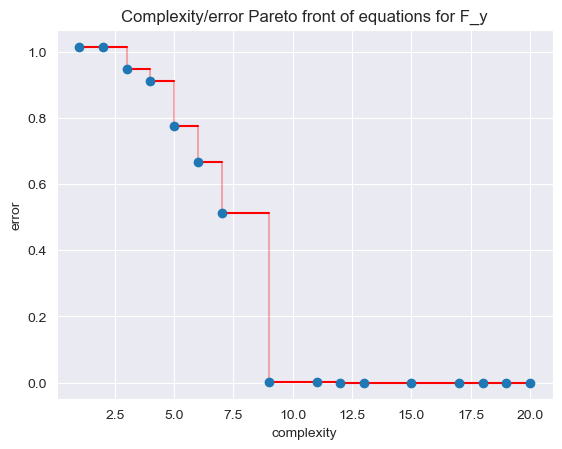

In [4]:
# load PySRRegressor file for F_x
pysr_y_pickle_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/regressor-F_y.pkl"
with open(pysr_y_pickle_file_name, "rb") as fp :
    pysr_y = pickle.load(fp)

complexity = pysr_y.equations_["complexity"].values
error = pysr_y.equations_["loss"].values

figure, ax = plt.subplots()

# now, this block of code plots red horizontal/vertical segments between points
for i in range(1, len(complexity)) :
    start_x = complexity[i-1]
    start_y = error[i-1]
    end_x = complexity[i]
    end_y = error[i]
    
    # first, a horizontal line
    ax.plot([start_x, end_x], [start_y, start_y], color='red')
    # then, a vertical line
    ax.plot([end_x, end_x], [start_y, end_y], color='red', alpha=0.3)
 
ax.scatter(complexity, error, zorder=2)
ax.set_title("Complexity/error Pareto front of equations for F_y")
ax.set_xlabel("complexity")
ax.set_ylabel("error")

In [5]:
print(pysr_y.equations_)

    complexity          loss         score  \
0            1  1.015058e+00  0.000000e+00   
1            2  1.015058e+00  1.970331e-07   
2            3  9.457101e-01  7.076461e-02   
3            4  9.117428e-01  3.657815e-02   
4            5  7.740768e-01  1.636868e-01   
5            6  6.673822e-01  1.483081e-01   
6            7  5.106999e-01  2.675808e-01   
7            9  9.637841e-05  4.287628e+00   
8           11  8.323078e-05  7.333246e-02   
9           12  1.098469e-05  2.025115e+00   
10          13  2.020018e-06  1.693396e+00   
11          15  1.246516e-06  2.413767e-01   
12          17  1.245256e-06  5.059050e-04   
13          18  2.275836e-07  1.699579e+00   
14          19  1.113469e-07  7.148671e-01   
15          20  1.107003e-07  5.823696e-03   

                                             equation  \
0                                        0.0029434662   
1                                    sin(0.002489353)   
2                                    0.0044406

NameError: name 'y_lowest' is not defined

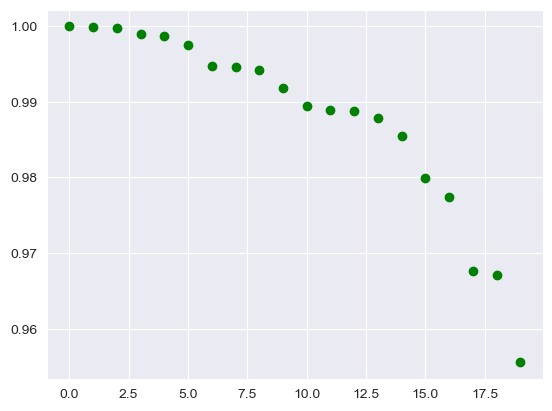

In [4]:
# another figure, this time let's load the set of candidate ODE systems with their R2 value
r2_values_file_name = "../local_results/2024-07-02-14-00-00-lotka-volterra/candidates_initial_performance.csv"
df_r2 = pd.read_csv(r2_values_file_name)

# some of the R2 values are like -10^380, so let's threshold them
r2_values = np.maximum(df_r2["R2"].values, -1.0)
r2_values = np.sort(r2_values)[::-1]
#print(r2_values)

# some thresholds that will be used for conditional coloring
high = 0.75
medium = 0.50
low = 0.00
lowest = -0.999

y_highest = np.ma.masked_where(r2_values < high, r2_values)
y_high = np.ma.masked_where((r2_values > high) | (r2_values < medium), r2_values)
y_ok = np.ma.masked_where((r2_values > medium) | (r2_values < low), r2_values)
y_bad = np.ma.masked_where((r2_values > low) | (r2_values < lowest), r2_values)
y_worst = np.ma.masked_where(r2_values > lowest, r2_values)

fraction_of_highest = (r2_values > high).sum() / len(r2_values) * 100.0
fraction_of_high = (r2_values > medium).sum() / len(r2_values) * 100.0
fraction_of_ok = (r2_values > low).sum() / len(r2_values) * 100.0

fig, ax = plt.subplots()
x = [i for i in range(0, len(r2_values))]
#ax.scatter(x, r2_values)
ax.scatter(x, y_highest, color="green", label="%.2f%%" % fraction_of_highest)
ax.scatter(x, y_lowest, color="yellow", label="%.2f%%" % fraction_of_high)
ax.scatter(x, y_ok, color="orange", label="%.2f%%" % fraction_of_ok)
ax.scatter(x, y_bad, color="lightcoral")
ax.scatter(x, y_worst, color="red", label="R2 <= -1.0")
ax.set_xlabel("Candidate systems sorted by R2 value")
ax.set_ylabel("R2 value")
ax.set_title("Candidate ODE systems for Lotka-Volterra (%d total)" % len(r2_values))
ax.legend(loc='best')

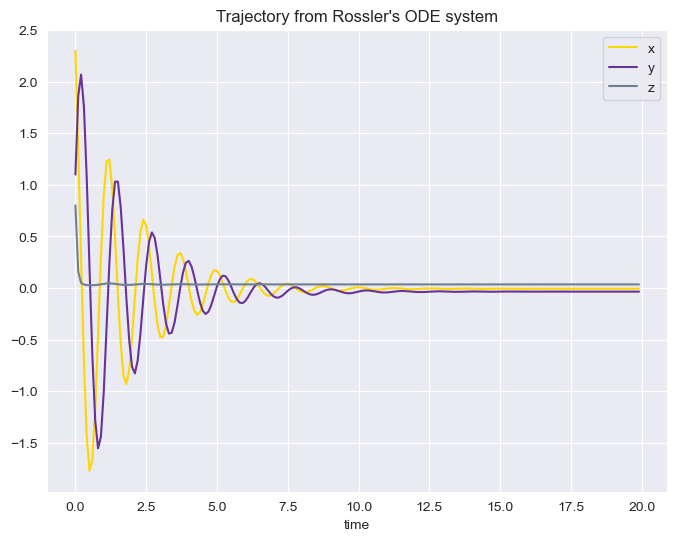

In [6]:
# let's now read the trajectory of another ODE system, Rossler
csv_file_name = "2024-07-09-23-20-16-rossler-stable/rossler-stable.csv"
df_ode = pd.read_csv(csv_file_name)
df_ode = df_ode.iloc[:200]

x = df_ode["t"].values
y_X_0 = df_ode["x_0"].values
y_X_1 = df_ode["x_1"].values
y_X_2 = df_ode["x_2"].values

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_X_0, color="gold", label="x")
ax.plot(x, y_X_1, color="rebeccapurple", label="y")
ax.plot(x, y_X_2, color="slategray", label="z")
ax.set_xlabel("time")
ax.set_title("Trajectory from Rossler's ODE system")
ax.legend(loc='best')


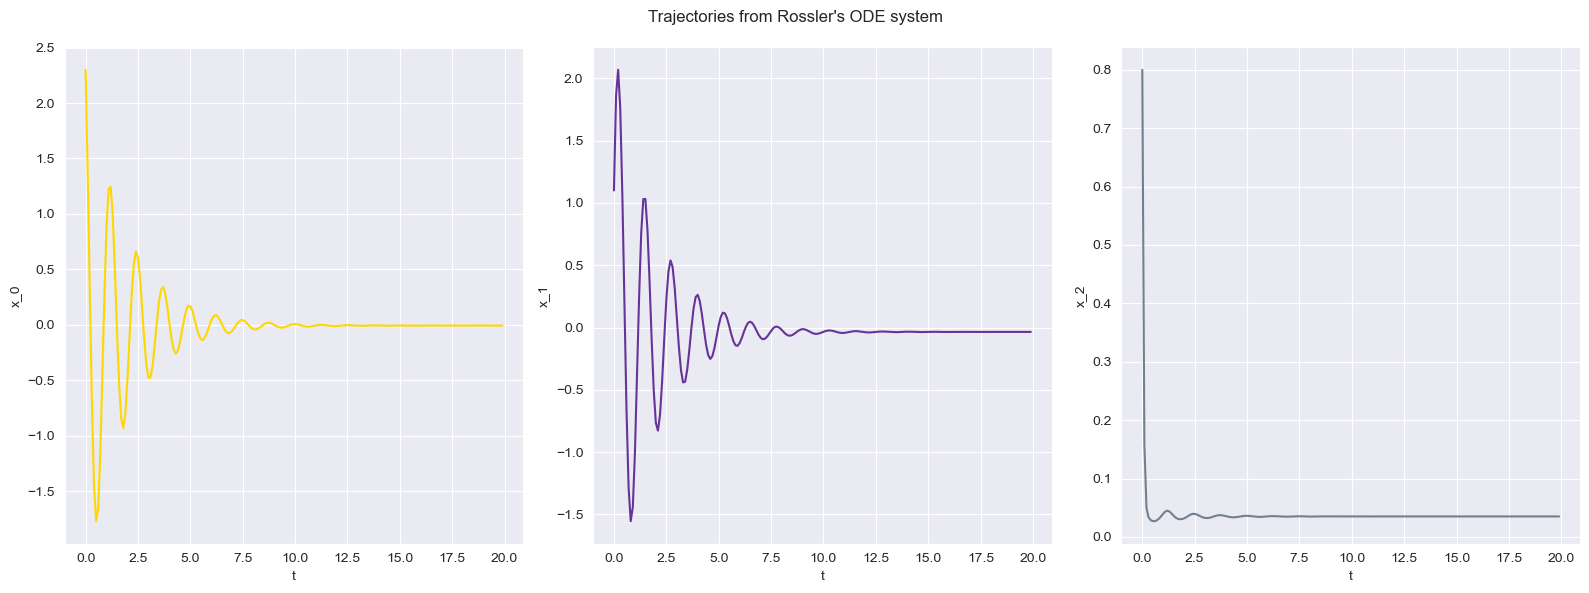

In [7]:
# we can probably do better
fig, axs = plt.subplots(figsize=(16,6), nrows=1, ncols=3)
axs[0].plot(x, y_X_0, color="gold", label="x")
axs[1].plot(x, y_X_1, color="rebeccapurple", label="y")
axs[2].plot(x, y_X_2, color="slategray", label="z")

axs[0].set_ylabel("x_0")
axs[1].set_ylabel("x_1")
axs[2].set_ylabel("x_2")

for ax in axs :
    ax.set_xlabel("t")
    
fig.suptitle("Trajectories from Rossler's ODE system")
fig.tight_layout()

# Figures from systematic experiments

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
target_file = "../local_results/check_odebench_all_transformations/summary.csv"
df = pd.read_csv(target_file)

# informative: number of times the R2 for a particular combination of data transformation + noise is higher than 0.9
data = {c : sum(df[c].values > 0.9) / df.shape[0] for c in df.columns if c not in }
print(c)

TypeError: '>' not supported between instances of 'str' and 'float'